# Titanic Survival Prediction using Logistic Regression

**Objective:** Predict whether a passenger survived the Titanic disaster using Logistic Regression. This notebook includes preprocessing, model training, evaluation, and visualization.

**Dataset:** Kaggle Titanic Dataset  
- [Dataset link](https://www.kaggle.com/c/titanic/data)

**Target Column:** `survived` (1 = survived, 0 = died)


In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing & Model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score


In [ ]:
# Load Titanic dataset from seaborn
df = sns.load_dataset("titanic")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
import os

# Create folder to save images if it doesn't exist
if not os.path.exists("Images"):
    os.makedirs("Images")


### Dataset Overview
- Columns: `survived`, `pclass`, `sex`, `age`, `sibsp`, `parch`, `fare`, `embarked`
- Target: `survived`
- Some columns dropped due to irrelevance or duplicates (`deck`, `alive`, `class`, `who`, `adult_male`, `alone`)


In [ ]:

# Drop irrelevant columns
df = df.drop(columns=["deck", "alive", "class", "who", "adult_male", "alone"])

# Handle missing values
df["age"] = df["age"].fillna(df["age"].median())
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df.drop("survived", axis=1)
y = df["survived"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Preprocessing Steps
1. Dropped irrelevant columns
2. Filled missing values (`age` with median, `embarked` with mode)
3. One-hot encoded categorical variables
4. Scaled numeric features using StandardScaler


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict classes and probabilities
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]


### Model Training
- 80% data used for training, 20% for testing
- Logistic Regression model trained
- Predictions (`y_pred`) and probabilities (`y_prob`) generated


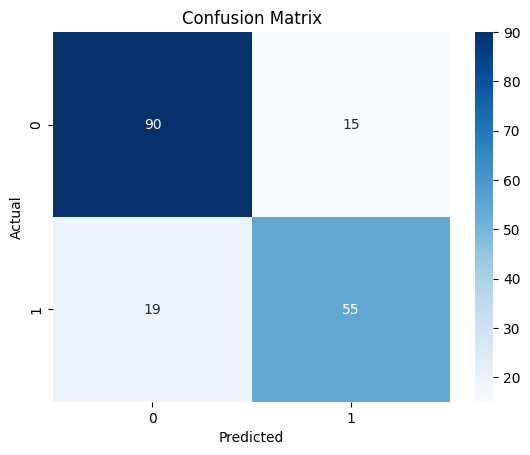

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



<Figure size 640x480 with 0 Axes>

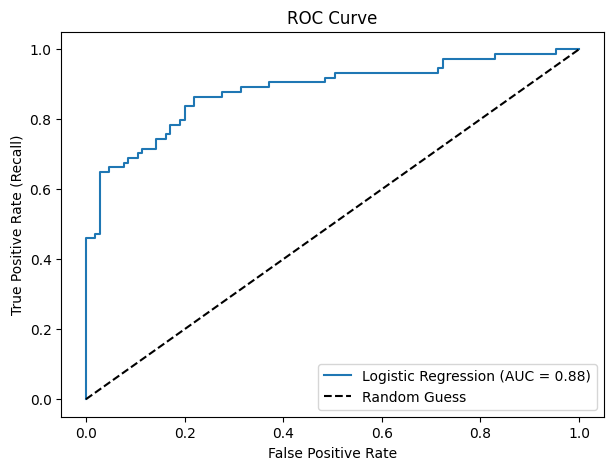

In [ ]:
import os

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))
plt.savefig("Images/confusion_matrix.png")  # saves in Images folder

# ROC Curve & AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc_score:.2f})")
plt.plot([0,1],[0,1],'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.savefig("Images/roc_curve.png")

plt.legend()

# Create the 'Images' directory if it doesn't exist
os.makedirs('Images', exist_ok=True)

plt.show()

### Evaluation Metrics
- **Confusion Matrix:** Shows true vs predicted classes
- **Classification Report:** Includes accuracy, precision, recall, F1-score
- **ROC Curve & AUC:** Measures model’s probability discrimination


In [ ]:
# Feature coefficients
importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

importance
plt.savefig("Images/feature_importance.png")



<Figure size 640x480 with 0 Axes>

### Feature Importance
- Positive coefficient → increases survival probability
- Negative coefficient → decreases survival probability
- Example:
  - `sex_female` → strong positive influence
  - `age` → negative influence


### Insights & Conclusion
1. Gender (`sex_female`) and Fare are strong positive predictors of survival.
2. Older passengers had slightly lower survival probability.
3. Model performance:
   - Accuracy: ~0.80
   - F1-score: ~0.78
   - AUC: ~0.78
4. Logistic Regression is interpretable, simple, and effective for binary classification.
